In [1]:
import pickle as pkl
import torch
import os
import torch, lcasr
import matplotlib.pyplot as plt

In [2]:
def get_data(prefix, base_path='./'):
    in_dir = os.listdir(base_path)
    in_dir = [f for f in in_dir if f.startswith(prefix)]
    in_dir = sorted(in_dir)
    data = []
    for f in in_dir:
        with open(base_path + f, 'rb') as file:
            data.append(pkl.load(file))
    return data

In [3]:
def pdecrease(data):
    min = data[0]
    data = data[1:]
    for i in range(len(data)): # percentage decrease
        data[i] = (min - data[i]) / min * 100
    return data
def pdecrease_dict(data, minkey=0):
    min = data[minkey]
    data = {k: (min - v) / min * 100 for k, v in data.items()}
    return data

---------
Freq Mask Evals
---------

In [4]:
chime6_test = get_data('chime6_test', base_path='./freq_mask/')
print(len(chime6_test))
test_wer = [d['wer'] for d in chime6_test]
print(f'Chime6 test WER: {sum(test_wer)/len(test_wer)}')

3
Chime6 test WER: 0.5935084008929621


In [5]:
test_wer

[0.5961755375396546, 0.5912054987663025, 0.5931441663729291]

------------------
Random Noise
------------------

In [6]:
ted_dev = get_data('tedlium-dev', base_path='./random_noise/')
print(len(ted_dev))
ted_dev_wer = [d['wer'] for d in ted_dev]
print(f'TEDLIUM dev WER: {sum(ted_dev_wer)/len(ted_dev_wer)}')

ted_test = get_data('tedlium-test', base_path='./random_noise/')
print(len(ted_test))
ted_test_wer = [d['wer'] for d in ted_test]
print(f'TEDLIUM test WER: {sum(ted_test_wer)/len(ted_test_wer)}')

earnings_dev = get_data('earnings22-dev', base_path='./random_noise/')
print(len(earnings_dev))
earnings_dev_wer = [d['wer'] for d in earnings_dev]
print(f'Earnings dev WER: {sum(earnings_dev_wer)/len(earnings_dev_wer)}')

earnings_test = get_data('earnings22-test', base_path='./random_noise/')
print(len(earnings_test))
earnings_test_wer = [d['wer'] for d in earnings_test]
print(f'Earnings test WER: {sum(earnings_test_wer)/len(earnings_test_wer)}')

chime6_dev = get_data('chime6-dev', base_path='./random_noise/')
print(len(chime6_dev))
dev_wer = [d['wer'] for d in chime6_dev]
print(f'Chime6 dev WER: {sum(dev_wer)/len(dev_wer)}')

chime6_test = get_data('chime6-test', base_path='./random_noise/')
print(len(chime6_test))
test_wer = [d['wer'] for d in chime6_test]
print(f'Chime6 test WER: {sum(test_wer)/len(test_wer)}')

rev16_test = get_data('rev16-test', base_path='./random_noise/')
print(len(rev16_test))
test_wer = [d['wer'] for d in rev16_test]
print(f'Rev16 test WER: {sum(test_wer)/len(test_wer)}')


3
TEDLIUM dev WER: 0.06613610404922442
3
TEDLIUM test WER: 0.05986177565124934
3
Earnings dev WER: 0.24484596291429406
3
Earnings test WER: 0.1959166445411161
3
Chime6 dev WER: 0.9224401655569552
3
Chime6 test WER: 0.980207966161438
3
Rev16 test WER: 0.18519350671235188


------------------------
Cutout
------------------------

In [7]:
ted_dev = get_data('tedlium-dev', base_path='./cutout/')
print(len(ted_dev))
ted_dev_wer = [d['wer'] for d in ted_dev]
print(f'TEDLIUM dev WER: {sum(ted_dev_wer)/len(ted_dev_wer)}')

ted_test = get_data('tedlium-test', base_path='./cutout/')
print(len(ted_test))
ted_test_wer = [d['wer'] for d in ted_test]
print(f'TEDLIUM test WER: {sum(ted_test_wer)/len(ted_test_wer)}')

earnings_dev = get_data('earnings22-dev', base_path='./cutout/')
print(len(earnings_dev))
earnings_dev_wer = [d['wer'] for d in earnings_dev]
print(f'Earnings dev WER: {sum(earnings_dev_wer)/len(earnings_dev_wer)}')

earnings_test = get_data('earnings22-test', base_path='./cutout/')
print(len(earnings_test))
earnings_test_wer = [d['wer'] for d in earnings_test]
print(f'Earnings test WER: {sum(earnings_test_wer)/len(earnings_test_wer)}')#

chime6_dev = get_data('chime6-dev', base_path='./cutout/')
print(len(chime6_dev))
dev_wer = [d['wer'] for d in chime6_dev]
print(f'Chime6 dev WER: {sum(dev_wer)/len(dev_wer)}')

chime6_test = get_data('chime6-test', base_path='./cutout/')
print(len(chime6_test))
test_wer_ct = [d['wer'] for d in chime6_test]
print(f'Chime6 test WER: {sum(test_wer_ct)/len(test_wer_ct)}')

rev16_test = get_data('rev16-test', base_path='./cutout/')
print(len(rev16_test))
test_wer_rev = [d['wer'] for d in rev16_test]
print(f'Rev16 test WER: {sum(test_wer_rev)/len(test_wer_rev)}')

3
TEDLIUM dev WER: 0.0629306215688442
3
TEDLIUM test WER: 0.05730994152046784
3
Earnings dev WER: 0.19015914732077677
3
Earnings test WER: 0.14662772569763563
3
Chime6 dev WER: 0.5484973906784236
3
Chime6 test WER: 0.6327987310539301
3
Rev16 test WER: 0.3785912827085663


In [8]:
test_wer_rev


[0.44359735080400137, 0.36269168117732964, 0.3294848161443679]

----- 
AWMC EVALS
-----

In [9]:
print('AWMC')
tedlium_test = get_data('ted_test', base_path='./awmc/')
print(len(tedlium_test))
test_wer = [d['wer'] for d in tedlium_test]
print(f'Tedlium (Test) WER: {sum(test_wer)/len(test_wer)*100}')

chime6_test = get_data('chime6_test', base_path='./awmc/')
test_wer = [d['wer'] for d in chime6_test]
print(f'Chime6 (Test) WER: {sum(test_wer)/len(test_wer)*100}')
chime6_dev = get_data('chime6_dev', base_path='./awmc/')
dev_wer = [d['wer'] for d in chime6_dev]
print(f'Chime6 (Dev) WER: {sum(dev_wer)/len(dev_wer)*100}')

AWMC
3
Tedlium (Test) WER: 6.213204166420541
Chime6 (Test) WER: 88.86715231269339
Chime6 (Dev) WER: 85.34408326562367


In [10]:
print('AWMC AUG')
earnings_test = get_data('earnings22_test', base_path='./awmc_aug/')
print(len(earnings_test))
test_wer = [d['wer'] for d in earnings_test]
print(f'Earnings22 (Test) WER: {sum(test_wer)/len(test_wer)*100}')
earnings_dev = get_data('earnings22_dev', base_path='./awmc_aug/')
dev_wer = [d['wer'] for d in earnings_dev]
print(f'Earnings22 (Dev) WER: {sum(dev_wer)/len(dev_wer)*100}')


tedlium_test = get_data('ted_test', base_path='./awmc_aug/')
print(len(tedlium_test))
test_wer = [d['wer'] for d in tedlium_test]
print(f'Tedlium (Test) WER: {sum(test_wer)/len(test_wer)*100}')
tedlium_dev = get_data('ted_dev', base_path='./awmc_aug/')
dev_wer = [d['wer'] for d in tedlium_dev]
print(f'Tedlium (Dev) WER: {sum(dev_wer)/len(dev_wer)*100}')

rev_test = get_data('rev16_test', base_path='./awmc_aug/')
print(len(rev_test))
test_wer = [d['wer'] for d in rev_test]
print(f'Rev16 (Test) WER: {sum(test_wer)/len(test_wer)*100}')

chime6_dev = get_data('chime6_dev', base_path='./awmc_aug/')
dev_wer = [d['wer'] for d in chime6_dev]
print(f'Chime6 (Dev) WER: {sum(dev_wer)/len(dev_wer)*100}')
chime6_test = get_data('chime6_test', base_path='./awmc_aug/')
test_wer = [d['wer'] for d in chime6_test]
print(f'Chime6 (Test) WER: {sum(test_wer)/len(test_wer)*100}')



AWMC AUG
3
Earnings22 (Test) WER: 15.785956288989192
Earnings22 (Dev) WER: 20.677349491409938
3
Tedlium (Test) WER: 5.955067241616949
Tedlium (Dev) WER: 6.761602986871031
3
Rev16 (Test) WER: 14.175428383707885
Chime6 (Dev) WER: 70.67371574299773
Chime6 (Test) WER: 75.86672149766969


---------
per epoch eval earnings-22
---------

In [11]:
ident = get_data(f'chime6_identity_dev', base_path='./identity/')[1]
#print(ident['wer']*100)
print(ident['ins_rate']*100)
print(ident['del_rate']*100)
print(ident['sub_rate']*100)

0.0
100.0
0.0


In [12]:
data[1][0]['del_rate']

NameError: name 'data' is not defined

In [ ]:
( data[0][0]['del_rate'] - data[5][0]['del_rate'] ) / data[0][0]['del_rate'] *100


30.29686864579097

In [ ]:
pdecrease([data[e][0]['del_rate']*100 for e in epochs])

[13.199105145413862,
 15.585384041759879,
 15.939597315436238,
 18.102162565249802,
 18.5868754660701,
 17.058165548098437,
 17.17002237136465,
 17.505592841163313,
 18.90380313199105,
 18.698732289336313]

['epoch-10-chime6-test_1.pkl', 'epoch-40-earnings22-test_1.pkl', 'epoch-2-rev16-test_1.pkl', 'epoch-4-tedlium-test_1.pkl', 'epoch-6-tedlium-test_1.pkl', 'epoch-0-earnings22-test_1.pkl', 'epoch-1-chime6-test_1.pkl', 'epoch-1-earnings22-test_1.pkl', 'epoch-3-chime6-test_1.pkl', 'epoch-1-tedlium-test_1.pkl', 'epoch-7-earnings22-test_1.pkl', 'epoch-8-earnings22-test_1.pkl', 'epoch-10-tedlium-test_1.pkl', 'epoch-2-chime6-test_1.pkl', 'epoch-5-earnings22-test_1.pkl', 'epoch-4-earnings22-test_1.pkl', 'epoch-7-tedlium-test_1.pkl', 'epoch-3-earnings22-test_1.pkl', 'epoch-6-chime6-test_1.pkl', 'epoch-9-earnings22-test_1.pkl', 'epoch-9-chime6-test_1.pkl', 'epoch-5-chime6-test_1.pkl', 'epoch-1-rev16-test_1.pkl', 'epoch-3-tedlium-test_1.pkl', 'epoch-9-tedlium-test_1.pkl', 'epoch-5-tedlium-test_1.pkl', 'epoch-6-earnings22-test_1.pkl', 'epoch-2-tedlium-test_1.pkl', 'epoch-4-chime6-test_1.pkl', 'epoch-7-chime6-test_1.pkl', 'epoch-10-earnings22-test_1.pkl', 'epoch-20-earnings22-test_1.pkl', 'epoch-8-te

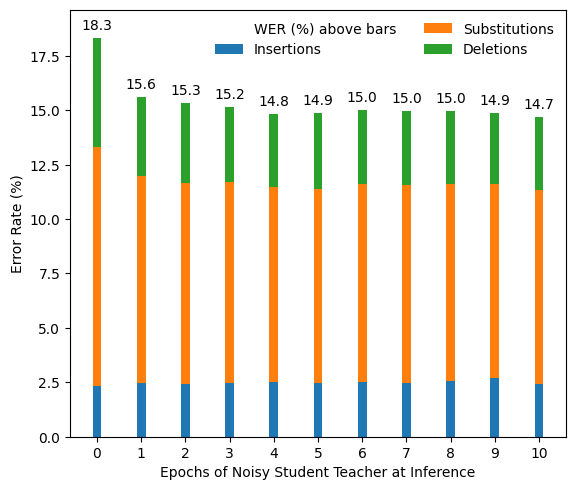

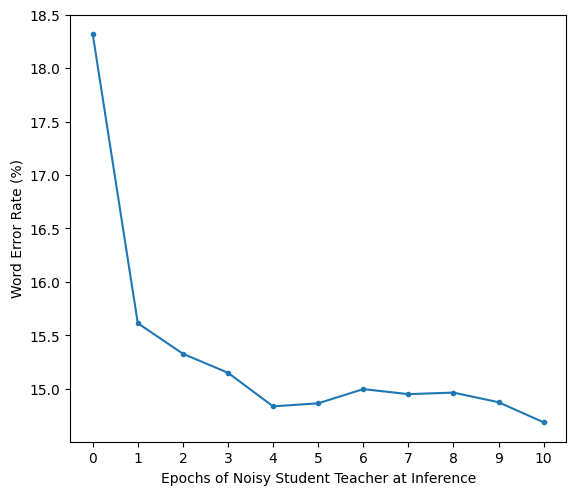

In [53]:
import matplotlib


print(os.listdir("./per_epoch_eval"))
epochs = list(set(sorted([int(el.split('-')[1]) for  el in os.listdir("./per_epoch_eval") if 'earnings22' in el])))
epochs = sorted(epochs)
data = {}
for e in epochs:
    data[e] = get_data(f'epoch-{e}-earnings22-test', base_path='./per_epoch_eval/')

#del epochs[-2]
all_epochs = epochs
epochs = epochs[:-2]
bar_width = 0.2  # adjust the width of each bar
import numpy as np

plt.plot([], [], ' ', label="WER (%) above bars")
plt.bar(epochs, [data[e][0]['ins_rate']*100 for e in epochs], width=bar_width, label='Insertions')
plt.bar(np.array(epochs), [data[e][0]['sub_rate']*100 for e in epochs], width=bar_width, label='Substitutions', bottom=[data[e][0]['ins_rate']*100 for e in epochs])
plt.bar(np.array(epochs), [data[e][0]['del_rate']*100 for e in epochs], width=bar_width, label='Deletions', bottom=[data[e][0]['ins_rate']*100 + data[e][0]['sub_rate']*100 for e in epochs])
#
#plt.plot(epochs, [data[e][0]['wer']*100 for e in epochs], marker='o', markersize=3, label='WER', color='black')

for e in epochs:
    plt.text(e, data[e][0]['wer']*100 +0.25, f'{data[e][0]["wer"]*100:.1f}', ha='center', va='bottom')

plt.xticks(epochs[:])
# legend position, also set so its transparent set loc




plt.legend(loc='upper right', framealpha=0.0, ncol=2)

plt.xlabel('Epochs of Noisy Student Teacher at Inference')
plt.ylabel('Error Rate (%)')


plt.ylim(0, max([data[e][0]['wer']*100 for e in epochs]) + 1.3)
#plt.xlim(epochs[0]-0.05, epochs[-1]+0.05)

plt.savefig('error_rates_per_epoch_earnings22.pdf', bbox_inches='tight')

plt.show()


# plot wer by epoch

plt.plot(list(epochs), [data[e][0]['wer']*100 for e in epochs], marker='o', markersize=3, label='WER')
plt.xlabel('Epochs of Noisy Student Teacher at Inference')
plt.ylabel('Word Error Rate (%)')
plt.xticks(epochs)
plt.savefig('wer_per_epoch_earnings22.pdf', bbox_inches='tight')
plt.show()


=========
NST EVALS
=========

In [114]:
epochs  = set([el.split("_")[1].split('-')[0] for el in os.listdir("./earningsNST/")])

dev_results = {'0':23.9}
test_results = {'0':18.3}
for epoch in epochs:
    for split in ['dev', 'test']:
        data = get_data(f'earnings22_{epoch}-{split}', base_path='./earningsNST/')
        if len(data) > 0 :
            if split == 'dev':
                dev_results[epoch] = data[0]['wer'] * 100
            else:
                test_results[epoch] = data[0]['wer'] *100

In [115]:
best_wer

NameError: name 'best_wer' is not defined

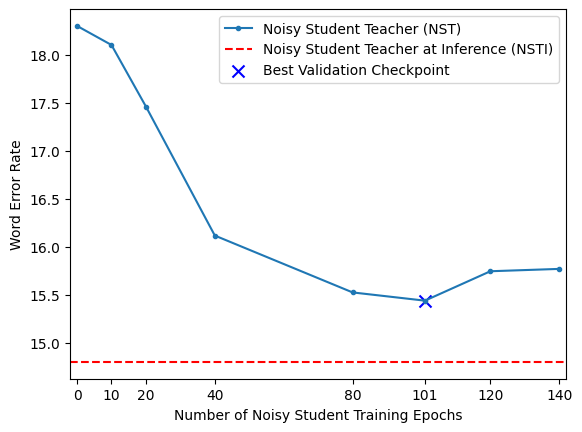

In [116]:
epochs = sorted([int(k) for k in test_results.keys() if k not in ["100", "5"]])

# make x axis log scale (base 2) on the following line

plt.plot(epochs, [test_results[str(e)] for e in epochs], label='Noisy Student Teacher (NST)', marker='o', markersize=3)
plt.xlabel('Number of Noisy Student Training Epochs')
plt.ylabel('Word Error Rate')
plt.xticks(epochs)

# Add a horizontal line at y=0.5
plt.axhline(y=14.8, color='red', linestyle='--', label='Noisy Student Teacher at Inference (NSTI)')

# Set the x-axis limits without padding
plt.xlim(epochs[0]-2, epochs[-1]+2)

# Add a point and annotate it with text
best_epoch = 101  # Replace with the actual best epoch
best_wer = test_results[str(best_epoch)]  # Replace with the actual best WER
plt.scatter(best_epoch, best_wer, color='blue', label='Best Validation Checkpoint', marker='x', s=75)

plt.legend()

plt.savefig('earnings_nst.pdf', bbox_inches='tight') 

# Show the plot
plt.show()




-----------------------
Seq lens eval
-----------------------

In [10]:
seq_lens_f = os.listdir('./seqlens')
baseline = get_data('earnings22-baseline', base_path='./seqlens/')
print(f'basline WER: {baseline[0]["wer"]}')

basline WER: 0.1898682403809635


In [16]:
results


{1: {397428: 16.277133424873643},
 2: {397428: 15.66800081801981},
 3: {},
 4: {},
 5: {}}

basline WER: 0.1898682403809635*100
[16.35893540565018, 16.071167723275583, 16.277133424873643]
16.235745517933136
[15.62271757866137, 15.88273101755821, 15.66800081801981]
15.724483138079796
[15.223932922375763, 15.365625639077976, 15.416751877063309]
15.335436812839015
[15.365625639077976, 15.269216161734203, 15.467878115048642]
15.367573305286939
[15.694294311840837, 15.318881650062814, 15.605188582780682]
15.539454848228111


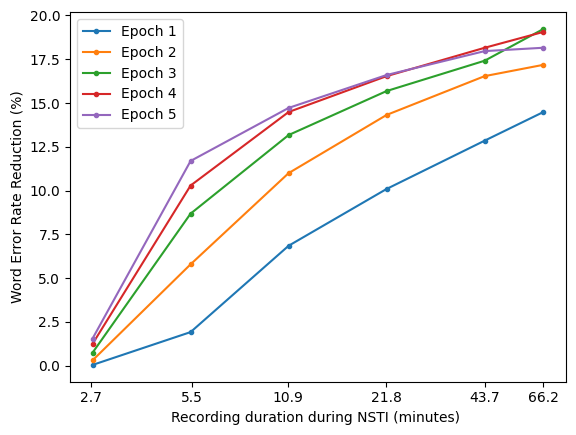

In [32]:
seq_lens_f = os.listdir('./seqlens')
baseline = get_data('earnings22-baseline', base_path='./seqlens/')
print(f'basline WER: {baseline[0]["wer"]}*100')

seq_lens_f = os.listdir('./seqlens')
epochs = [1,2,3,4,5]
seq_lens = [16384, 32768, 65536, 131072, 262144]
results = {}
for i, e in enumerate(epochs):
    results[e] = {}
    for s in seq_lens:
        data = get_data(f'earnings22-{s}-epoch-{e}-test', base_path='./seqlens/')
        if len(data) > 0:
            results[e][s] = sum([data[i]['wer']*100 for i in range(len(data))])/len(data)

#397428
            #earnings22-360000-plus-epoch-2-test_1.pkl
for i, e in enumerate(epochs):
    data = get_data(f'earnings22-{360000}-plus-epoch-{e}-test', base_path='./seqlens/')
    if len(data) > 0:
        print([data[i]['wer']*100 for i in range(len(data))])
        print(sum([data[i]['wer']*100 for i in range(len(data))])/len(data))
        results[e][397428] = sum([data[i]['wer']*100 for i in range(len(data))])/len(data)



import matplotlib
for e in epochs:
    plt.plot([el/100/60 for el in results[e].keys()], pdecrease([baseline[0]['wer']*100]+list(results[e].values())), label=f'Epoch {e}', marker='o', markersize=3)

# for e in epochs:
#     plt.plot([el/100/60 for el in results[e].keys()], (list(results[e].values())), label=f'Epoch {e}', marker='o', markersize=3)


ax=plt.gca()
ax.set_xscale('log', base=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(seq_lens + [397428]) if round(el/100/60, 1) != 60])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=10)
plt.xlabel('Recording duration during NSTI (minutes) ')
plt.ylabel('Word Error Rate Reduction (%)')
plt.legend()
plt.savefig('earnings_nst_seq_lens.pdf', bbox_inches='tight')

In [21]:
import numpy as np
np.array([15.223932922375763, 15.365625639077976, 15.416751877063309]).std()

0.08156106605468101

--------------------------
In-dataset generalisation
--------------------------

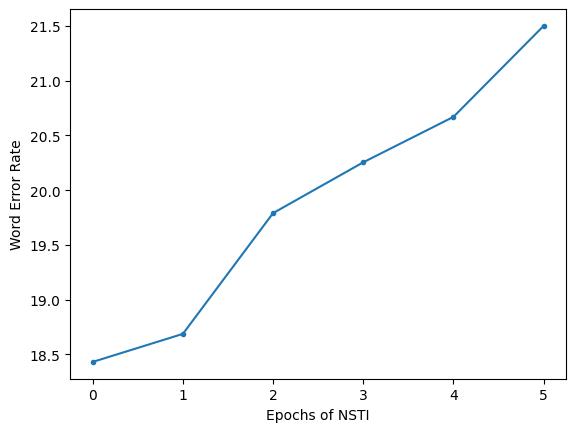

{0: 0.0,
 1: -1.390498261877149,
 2: -7.379779837775192,
 3: -9.900057937427567,
 4: -12.15237543453069,
 5: -16.664252607184228}

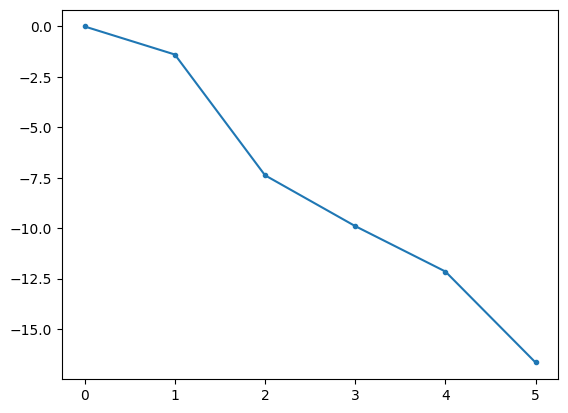

In [10]:
epochs = [0,1,2,3,4,5]
results = {}
for i, e in enumerate(epochs):
    data = get_data(f'earnings22-{e}-test', base_path='./indataset/')
    wer = [d['wer'] for d in data]
    results[e] = sum(wer)/len(wer)*100

plt.plot(epochs, [results[e] for e in epochs], label='In-dataset', marker='o', markersize=3)
plt.xlabel('Epochs of NSTI')
plt.ylabel('Word Error Rate')
plt.xticks(epochs)
plt.savefig('earnings_nst_indataset.pdf', bbox_inches='tight')
plt.show()

results_pdecrease = pdecrease_dict(results, 0)

plt.plot(epochs, [results_pdecrease[e] for e in epochs], label='In-dataset', marker='o', markersize=3)
results_pdecrease

------------------
Cross dataset generalisation
------------------

In [101]:
results

{1: 6.652489810384547,
 2: 6.861598440545809,
 3: 7.34006734006734,
 4: 7.875243664717349,
 5: 8.530923267765372}

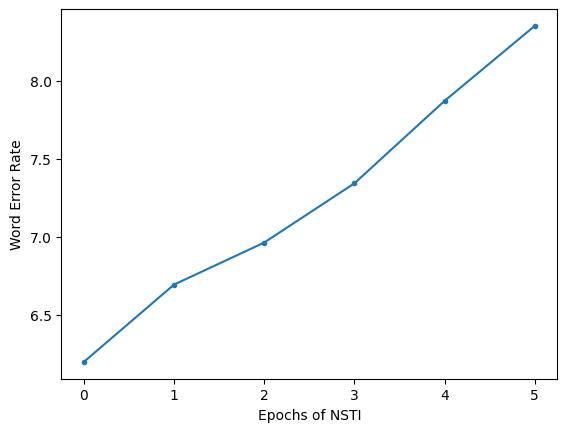

{1: -7.98419966501462,
 2: -12.328720138567347,
 3: -18.44534764738498,
 4: -26.96289436527127,
 5: -34.708717051671194,
 0: 0.0}

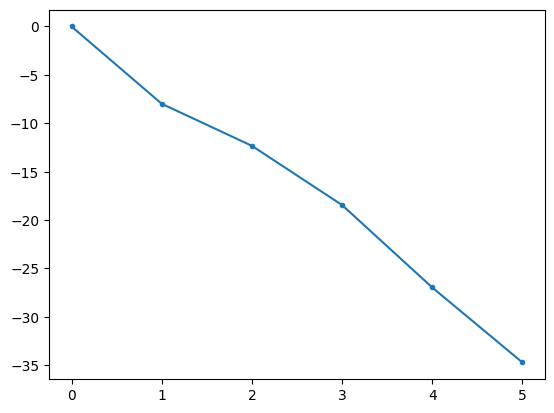

In [68]:
epochs = [1,2,3,4,5]
results = {}
for i, e in enumerate(epochs):
    data = get_data(f'earnings_tedlium_epoch-{e}-test', base_path='./crossdataset/')
    wer = [d['wer'] for d in data]
    results[e] = sum(wer)/len(wer)*100

results[0] = 6.2
epochs = [0] + epochs
plt.plot(epochs, [results[e] for e in epochs], label='In-dataset', marker='o', markersize=3)
plt.xlabel('Epochs of NSTI')
plt.ylabel('Word Error Rate')
plt.xticks(epochs)
#plt.savefig('earnings_nst_indataset.pdf', bbox_inches='tight')
plt.show()

results_pdecrease = pdecrease_dict(results, 0)
plt.plot(epochs, [results_pdecrease[e] for e in epochs], label='In-dataset', marker='o', markersize=3)
results_pdecrease 


------------------
Gender Eval
------------------

In [12]:
!ls ./gender_eval_tedlium

tedlium-epoch-1-test_1.pkl  tedlium-epoch-4-test_1.pkl
tedlium-epoch-2-test_1.pkl  tedlium-epoch-5-test_1.pkl
tedlium-epoch-3-test_1.pkl


In [67]:
get_data(f'tedlium-epoch-{3}-test', base_path='gender_eval_tedlium/')[0]['male_to_male']

[{'wer': 0.06766604205704768,
  'words': 9606,
  'ins_rate': 0.012075785967103894,
  'del_rate': 0.022069539870914014,
  'sub_rate': 0.03352071621902977},
 {'wer': 0.05668016194331984,
  'words': 6422,
  'ins_rate': 0.011211460604173155,
  'del_rate': 0.012768607910308314,
  'sub_rate': 0.03270009342883837},
 {'wer': 0.07874015748031496,
  'words': 2286,
  'ins_rate': 0.009623797025371828,
  'del_rate': 0.021872265966754154,
  'sub_rate': 0.047244094488188976}]

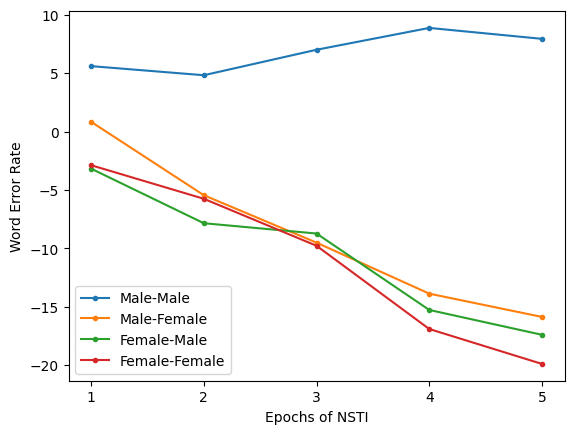

In [56]:
def get_wer_from_data(data, setting):
    words = sum([el['words'] for el in data[0][setting]])
    ins = sum([el['ins_rate']*el['words'] for el in data[0][setting]])
    dels = sum([el['del_rate']*el['words'] for el in data[0][setting]])
    sub = sum([el['sub_rate']*el['words'] for el in data[0][setting]])
    return ((ins + dels + sub) / words) * 100

male_baseline = data[0]['male_baseline']
female_baseline = data[0]['female_baseline']

results = {
    "Male-Male": [male_baseline["wer"]*100],
    "Male-Female": [female_baseline["wer"]*100],
    "Female-Male": [male_baseline["wer"]*100],
    "Female-Female": [female_baseline["wer"]*100]
}

for epoch in [1,2,3,4,5]:
    data = get_data(f'tedlium-epoch-{epoch}-test', base_path='gender_eval_tedlium/')

    results["Male-Male"].append(get_wer_from_data(data, setting="male_to_male"))
    results["Male-Female"].append(get_wer_from_data(data, setting="male_to_female"))
    results["Female-Female"].append(get_wer_from_data(data, setting="female_to_female"))
    results["Female-Male"].append(get_wer_from_data(data, setting="female_to_male"))

    # print(f'Male baseline: {male_baseline["wer"]*100}, Female baseline: {female_baseline["wer"]*100}')
    # print(f'Male-to-male {get_wer_from_data(data, setting="male_to_male")}')
    # print(f'Male-to-female {get_wer_from_data(data, setting="male_to_female")}')

for key in results:
    plt.plot([1,2,3,4,5], pdecrease(results[key]), label=key, marker='o', markersize=3)

plt.xlabel('Epochs of NSTI')
plt.ylabel('Word Error Rate')
plt.xticks([1,2,3,4,5])
plt.legend()



In [40]:
data[0]['male_to_female']

[{'wer': 0.0407606137625906,
  'words': 10623,
  'ins_rate': 0.006212934199378707,
  'del_rate': 0.010072484232326085,
  'sub_rate': 0.024475195330885813},
 {'wer': 0.04085474912924786,
  'words': 10623,
  'ins_rate': 0.006118798832721453,
  'del_rate': 0.010543161065612351,
  'sub_rate': 0.024192789230914055},
 {'wer': 0.040195801562647085,
  'words': 10623,
  'ins_rate': 0.006024663466064201,
  'del_rate': 0.00931940129906806,
  'sub_rate': 0.024851736797514828}]

In [28]:
setting = 'male_to_male'
words = sum([el['words'] for el in data[0][setting]])
ins = sum([el['ins_rate']*el['words'] for el in data[0][setting]])
dels = sum([el['del_rate']*el['words'] for el in data[0][setting]])
sub = sum([el['sub_rate']*el['words'] for el in data[0][setting]])

wer = (ins + dels + sub) / words * 100
wer

6.617887954570274